/opt/anaconda/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


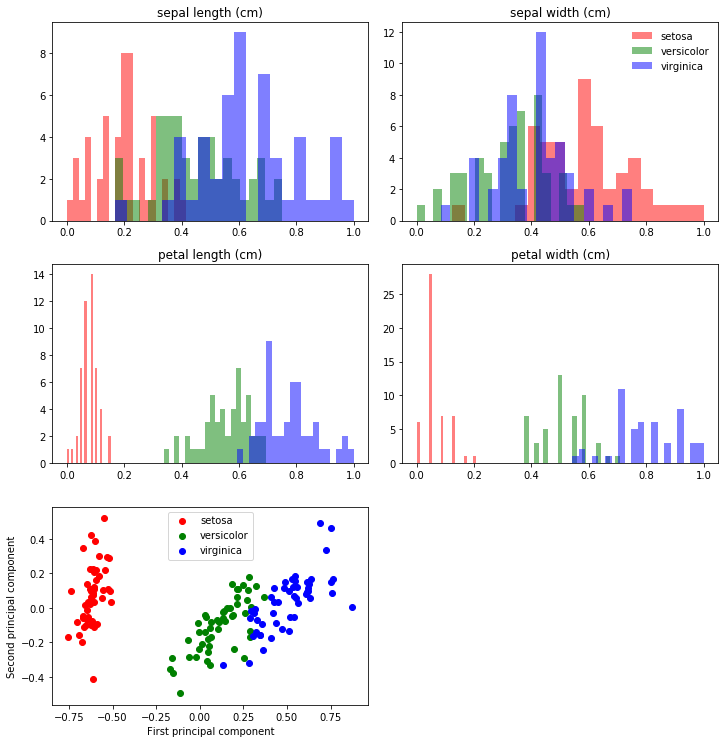

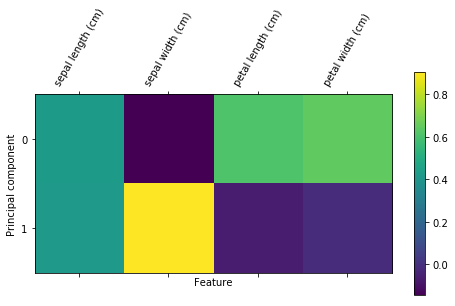

In [2]:
"""
The notebook is focused on feature decomposition and getting main components from high dimension dataset.
Iris dataset was used. The data was scaled, laballed and visualised.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec

# load and scale the data
data = load_iris()
scaler = MinMaxScaler()
scaler.fit(data.data)
data.data = scaler.transform(data.data)

# labelling
setosa = data.data[data.target == 0]
versicolor = data.data[data.target == 1]
virginica = data.data[data.target == 2]

# plot the data in a form of a grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 2)

# plot the original data
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
for i, ax in zip(range(4), (ax1, ax2, ax3, ax4)):
    ax.hist(setosa[:, i], bins=20, alpha=0.5, color='r', label=data.target_names[0])
    ax.hist(versicolor[:, i], bins=20, alpha=0.5, color='g', label=data.target_names[1])
    ax.hist(virginica[:, i], bins=20, alpha=0.5, color='b', label=data.target_names[2])
    ax.set_title(data.feature_names[i])
ax2.legend(loc=0, edgecolor="white")
plt.tight_layout()

# decomposition
pca = PCA(n_components=2)
pca.fit(data.data)
data_pca = pca.transform(data.data)

# plot the transformed data
ax5 = plt.subplot(gs[2, 0])
ax5.scatter(data_pca[:, 0][data.target==0], data_pca[:, 1][data.target==0], c='r', label=data.target_names[0])
ax5.scatter(data_pca[:, 0][data.target==1], data_pca[:, 1][data.target==1], c='g', label=data.target_names[1])
ax5.scatter(data_pca[:, 0][data.target==2], data_pca[:, 1][data.target==2], c='b', label=data.target_names[2])
ax5.legend(loc=9)
ax5.set_xlabel("First principal component")
ax5.set_ylabel("Second principal component")

# show features impact on data
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
plt.xlabel("Feature")
plt.ylabel("Principal component")
plt.xticks(range(len(data.feature_names)), data.feature_names, rotation=60)
plt.tight_layout() 
